In [77]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplt
import bls
import plotly.graph_objs as go
import plotly.express as px
import statsmodels

In [8]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('bls_cpi_data.csv')
cpi_data = pd.read_csv('bls_cpi_data.csv')

No Data Available for Series CUUR0000SA0 Year: 2023


In [9]:
cpi_data

,date,CUUR0000SA0
0,2014-01,233.916
1,2014-02,234.781
2,2014-03,236.293
3,2014-04,237.072
4,2014-05,237.900
...,...,...
103,2022-08,296.171
104,2022-09,296.808
105,2022-10,298.012
106,2022-11,297.711


In [11]:
cpi_data.columns = 'Date','CPI'
cpi_data

,Date,CPI
0,2014-01,233.916
1,2014-02,234.781
2,2014-03,236.293
3,2014-04,237.072
4,2014-05,237.900
...,...,...
103,2022-08,296.171
104,2022-09,296.808
105,2022-10,298.012
106,2022-11,297.711


In [12]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_wages_data.csv')
wages_data = pd.read_csv('bls_wages_data.csv')

No Data Available for Series CIU2020000000000A Year: 2023


In [18]:
wages_data.columns = 'Date','Wages'
wages_data.head()

,Date,Wages
0,2014Q1,1.7
1,2014Q2,1.9
2,2014Q3,2.3
3,2014Q4,2.2
4,2015Q1,2.8


In [20]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data['Date']

0      2014-01
1      2014-02
2       2014Q1
3      2014-04
4      2014-05
        ...   
103    2022-08
104     2022Q3
105    2022-10
106    2022-11
107     2022Q4
Name: Date, Length: 108, dtype: object

In [24]:
newcpi = cpi_data[(cpi_data.Date.str.contains("-") == False)]
newcpi.to_csv('cpi-clean.csv')

In [34]:
newcpi

,Date,CPI
2,2014Q1,236.293
5,2014Q2,238.343
8,2014Q3,238.031
11,2014Q4,234.812
14,2015Q1,236.119
17,2015Q2,238.638
20,2015Q3,237.945
23,2015Q4,236.525
26,2016Q1,238.132
29,2016Q2,241.018


In [28]:
newdf = wages_data
newdf

,Date,Wages
0,2014Q1,1.7
1,2014Q2,1.9
2,2014Q3,2.3
3,2014Q4,2.2
4,2015Q1,2.8
5,2015Q2,2.2
6,2015Q3,2.1
7,2015Q4,2.1
8,2016Q1,2.0
9,2016Q2,2.6


In [49]:
#To adjust the two datasets in a comparable way, we have to converge The Wages values and CPI values on a singular value type.
#Currently The CPI values show an exact decimal value while the Wages show an anual % increase, for each quarter, considering
#the shown % changes were allowed to continue for the entire year. We will therefore, scale them down to quarterly values and
#also convert them from a percentage to actual numerical values. We can do this by using the following function:

#The number 233.9 has been arbitrarily used as a starting point, as it is the value in our initial dataset i.e. the
#CPI for the first month of 2014.
newnum = 233.9
def process_wages(x):
    global newnum
    if type(x) is str:
        return x
    elif x:
        newnum = (x / 400) * newnum + newnum
        return newnum
    else:
        return
newwages = newdf.applymap(process_wages)

In [36]:
newwages

,Date,Wages
0,2014Q1,177.852675
1,2014Q2,178.697475
2,2014Q3,179.724986
3,2014Q4,180.713473
4,2015Q1,181.978467
5,2015Q2,182.979349
6,2015Q3,183.939991
7,2015Q4,184.905676
8,2016Q1,185.830204
9,2016Q2,187.038100


In [47]:
merged_data = pd.merge(newcpi, newwages, on='Date')
merged_data

,Date,CPI,Wages
0,2014Q1,236.293,234.894075
1,2014Q2,238.343,236.009822
2,2014Q3,238.031,237.366878
3,2014Q4,234.812,238.672396
4,2015Q1,236.119,240.343103
5,2015Q2,238.638,241.664990
6,2015Q3,237.945,242.933731
7,2015Q4,236.525,244.209133
8,2016Q1,238.132,245.430179
9,2016Q2,241.018,247.025475


Text(0.5, 0, 'Dates')

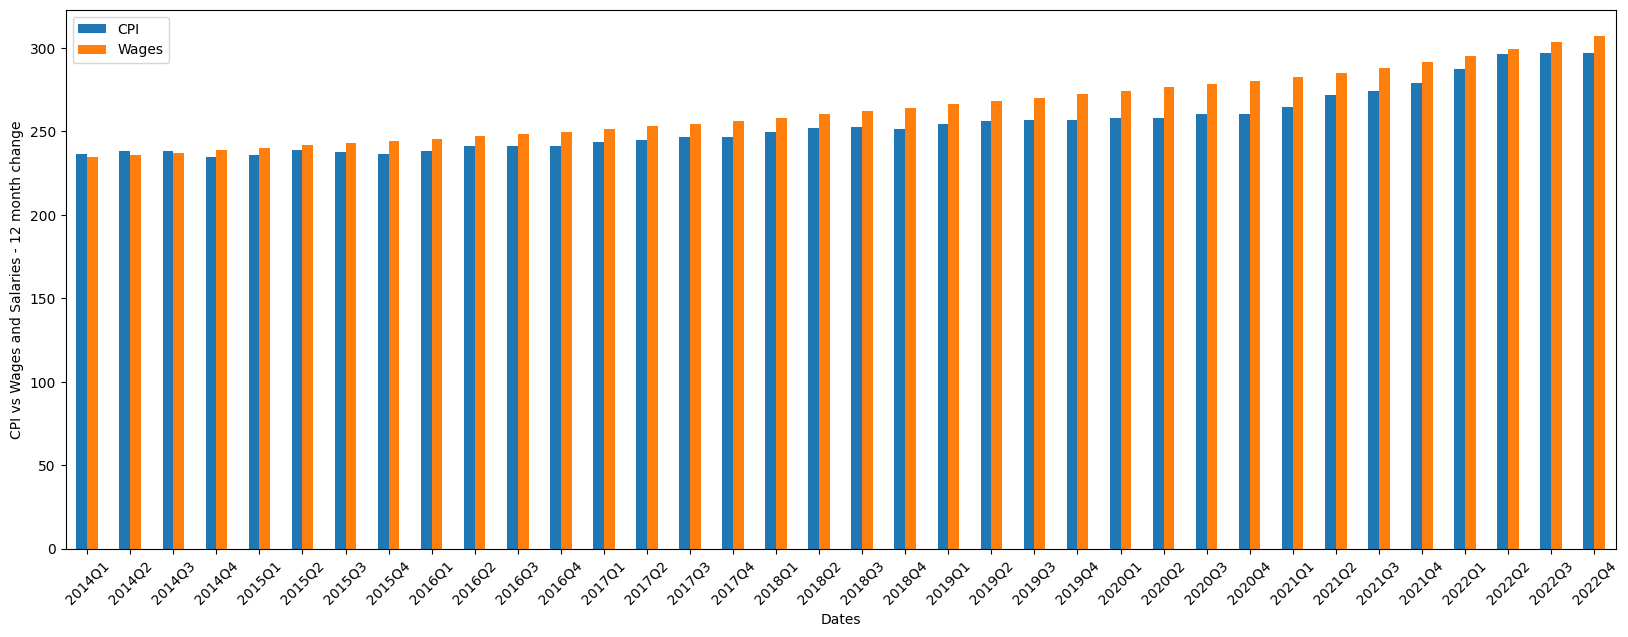

In [48]:
#Showing the data using a bar chart
ax = merged_data.plot(kind='bar', figsize=(20,7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs Wages and Salaries - 12 month change')
ax.set_xlabel('Dates')

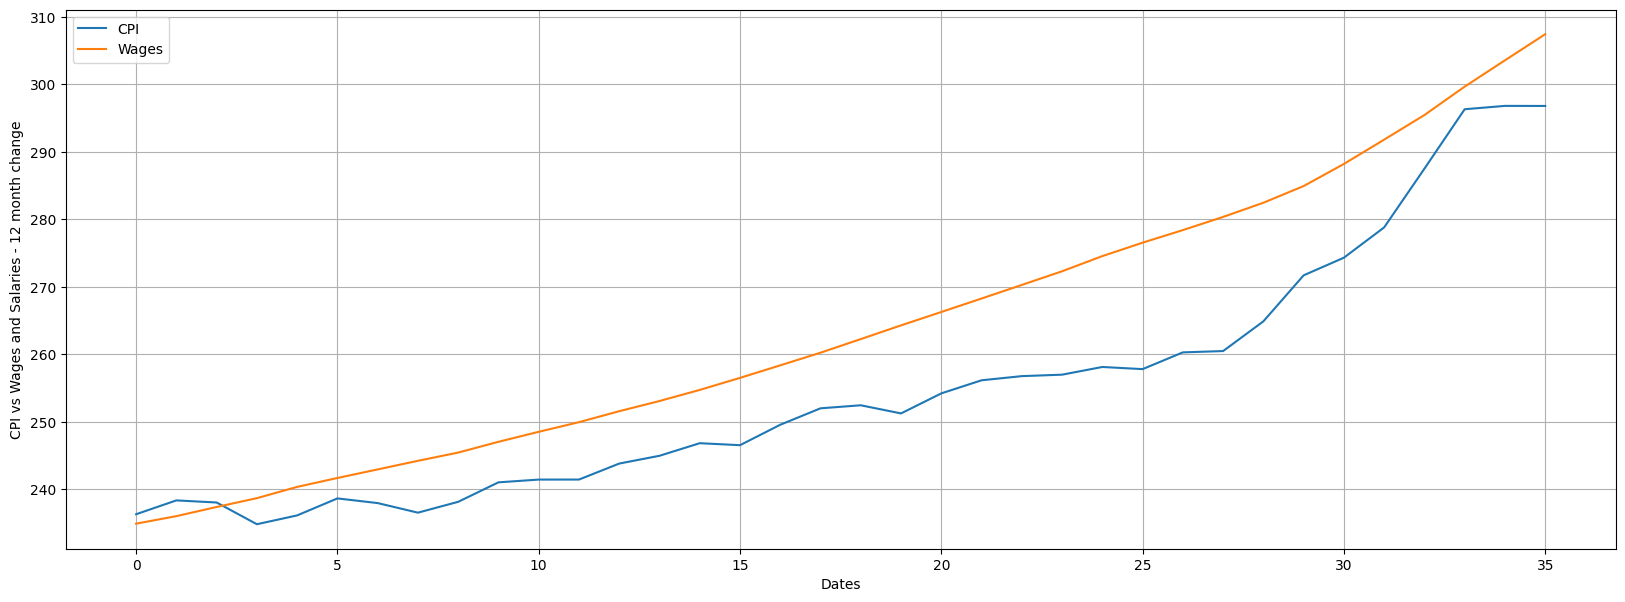

In [52]:
#Showing the data using a line graph
ax = merged_data.plot(kind='line', figsize=(20,7))
ax.set_ylabel('CPI vs Wages and Salaries - 12 month change')
ax.set_xlabel('Dates')
ax.grid()

In [78]:
#Using ordinary least squares regression to show the relationship between the CPI and Wages
fig = px.scatter(merged_data, x= "CPI", y = "Wages",trendline="ols", hover_data=["Wages","CPI"])
fig.show()